       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


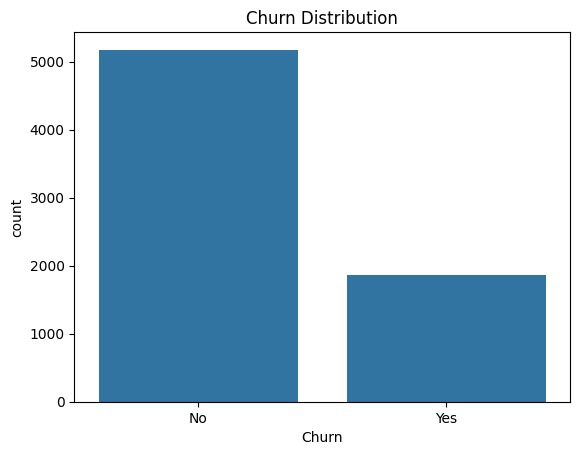

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('C:/Users/swast/OneDrive/Desktop/ML activitiy/Activity1_customer_churn/data/churn.csv')

# Basic statistics
print(df.describe())

# Visualize churn distribution
# Check for typos and capitalization in the column name
# and replace 'Churn' with the actual column name
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

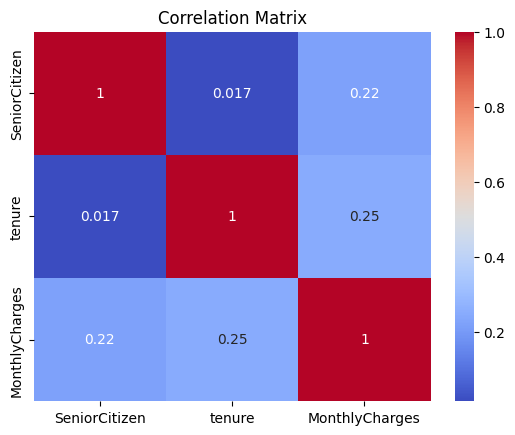

In [8]:
# Correlation matrix
# Exclude non-numeric columns from the correlation calculation
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

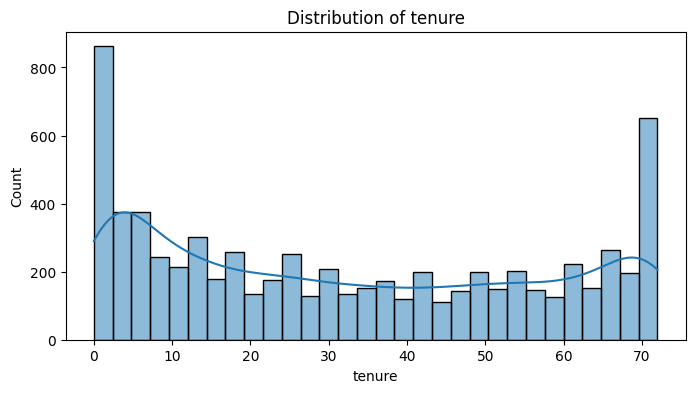

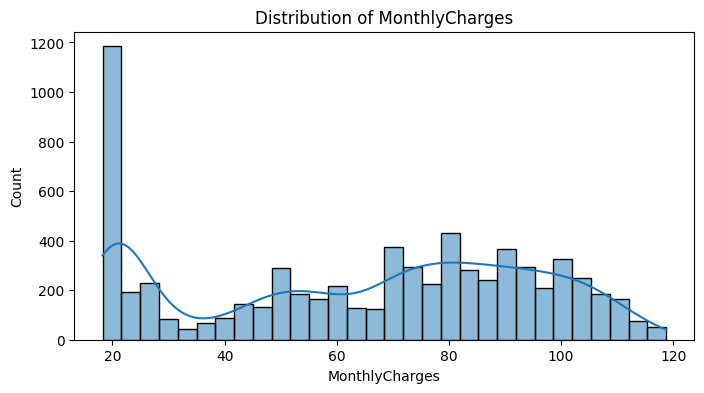

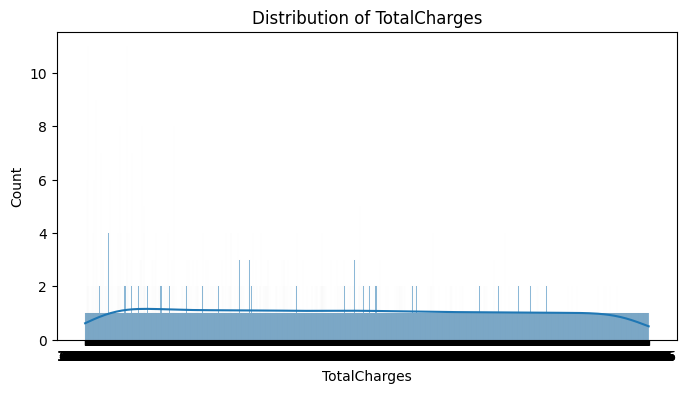

In [9]:
# Distribution of numerical features
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.show()

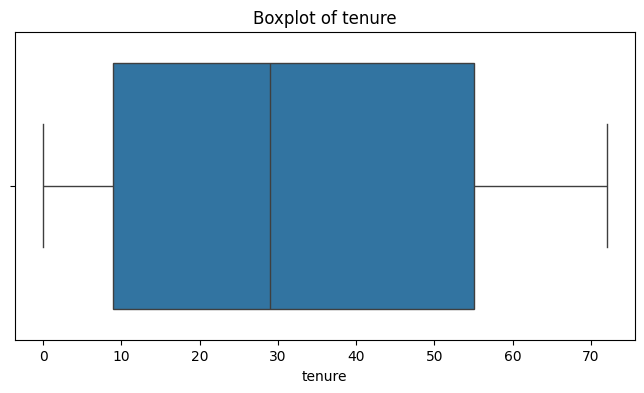

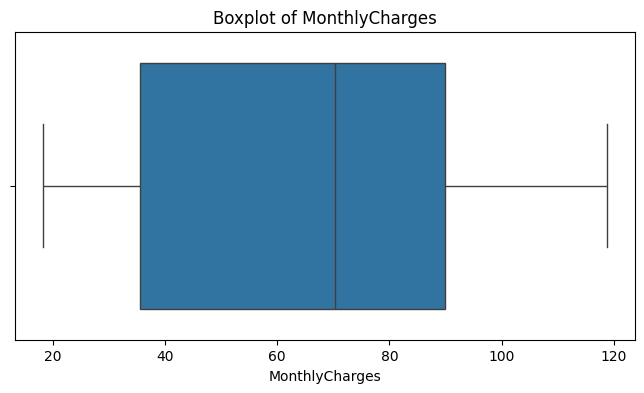

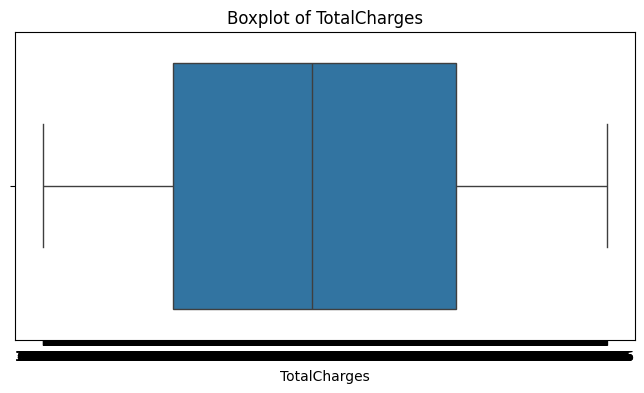

In [10]:
# Boxplot for outlier detection
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.show()

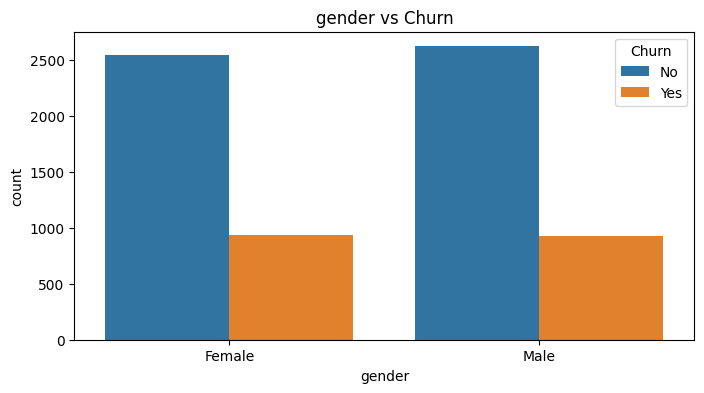

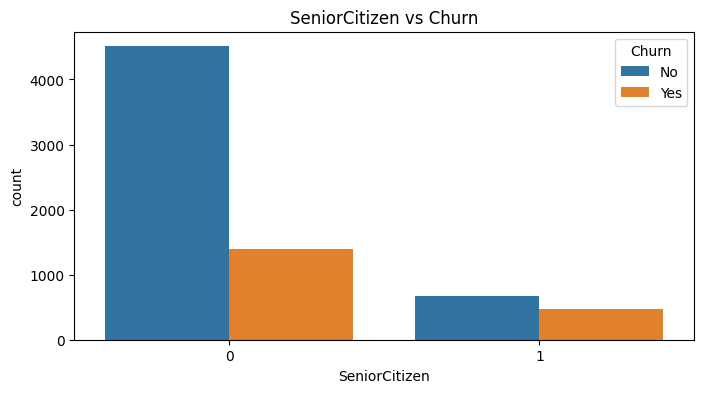

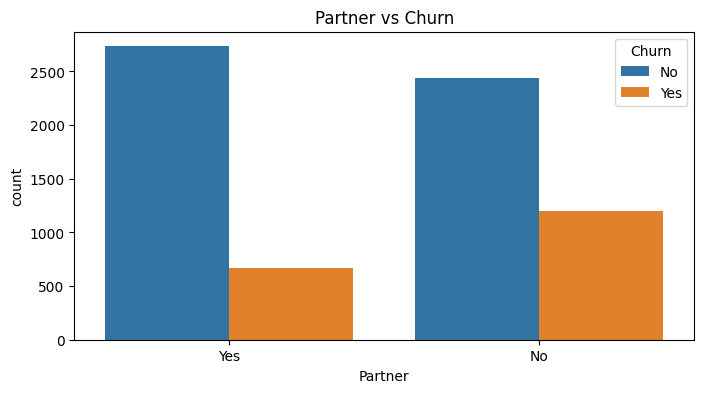

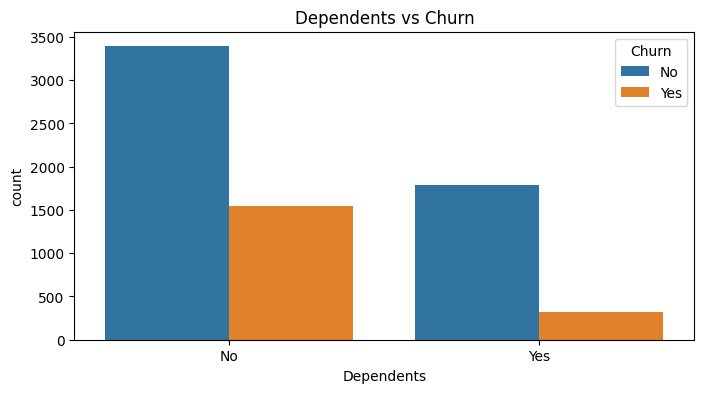

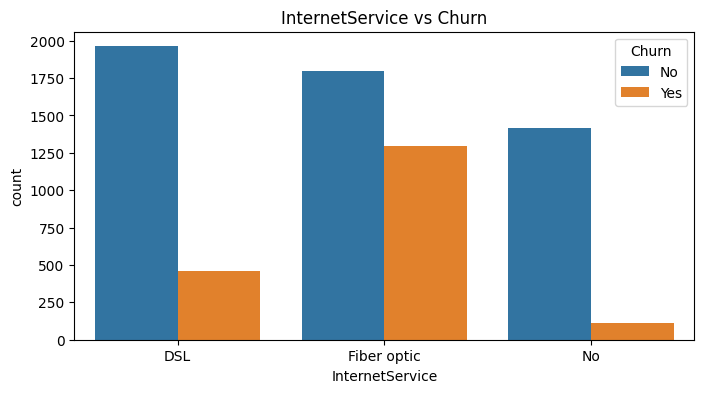

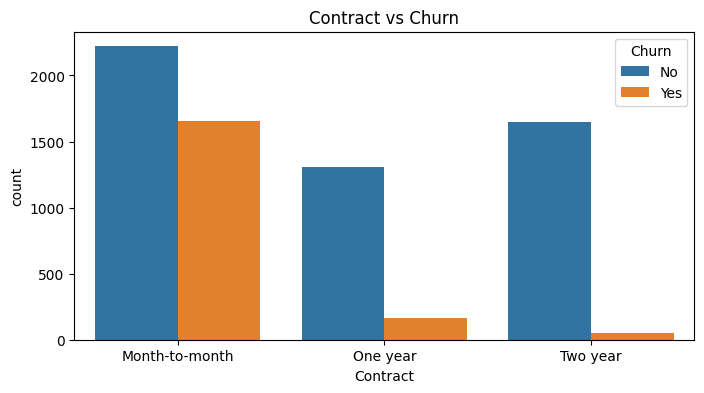

In [11]:
# Count plots for categorical variables against Churn
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'Contract']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    # Use 'Churn' for hue and specify the actual values for the legend
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
plt.show()

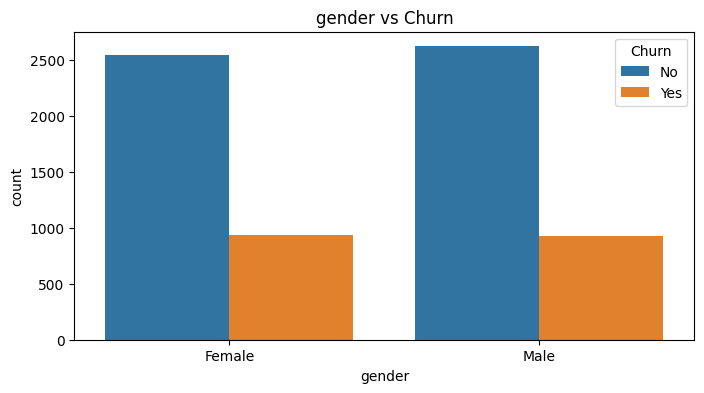

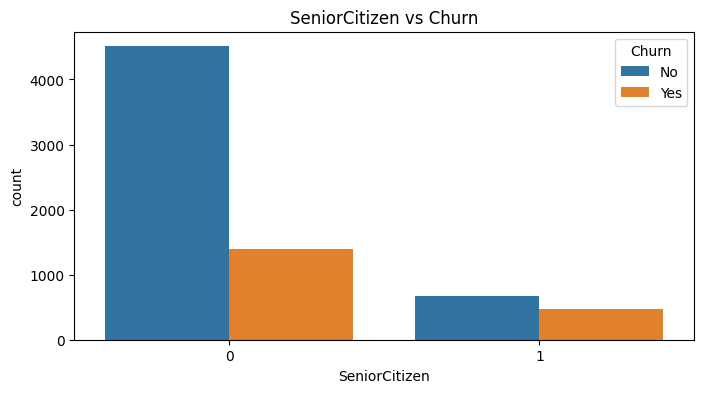

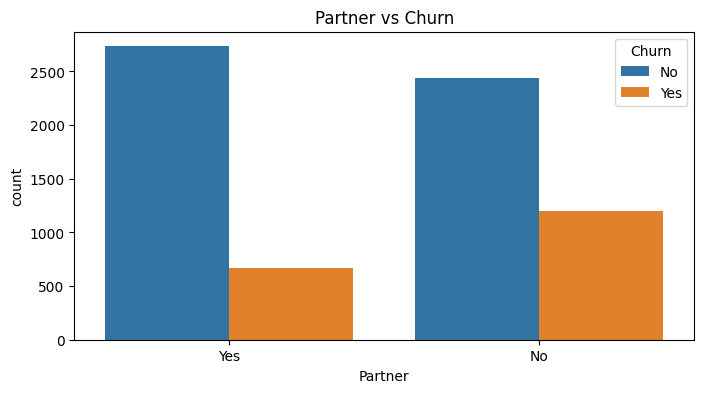

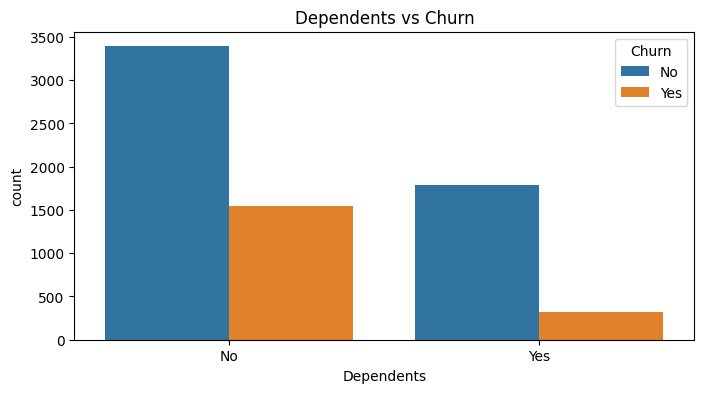

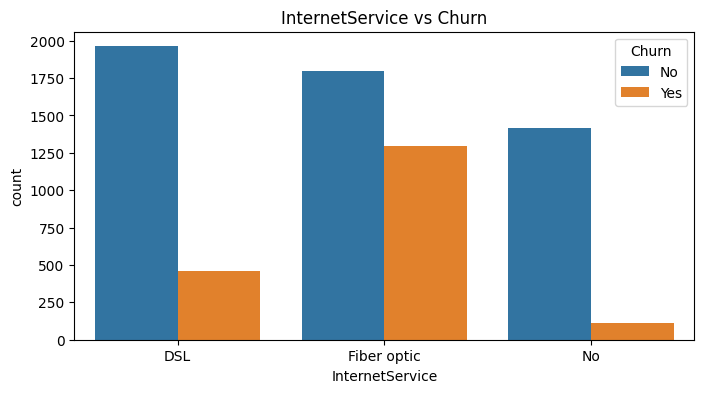

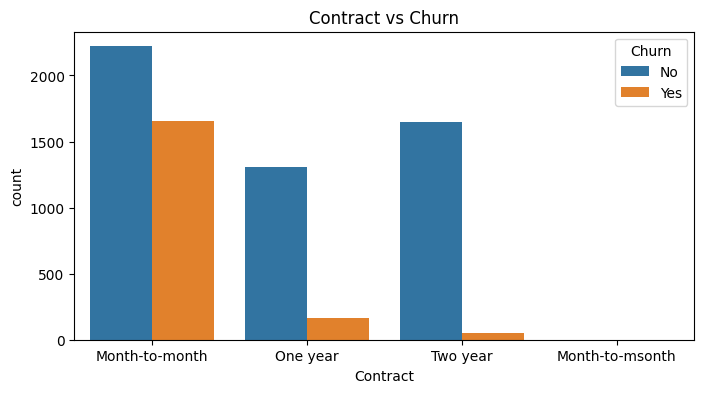

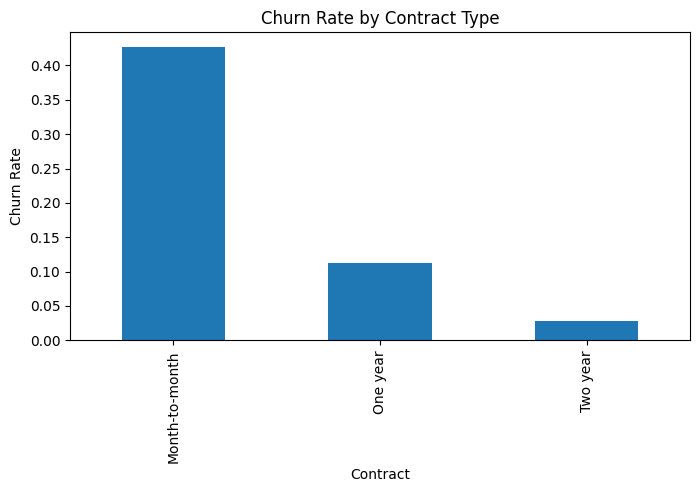

In [12]:
# Contract type vs Churn
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean()) # Calculate the mean of boolean values (True for 'Yes', False for 'No')
plt.figure(figsize=(8, 4))
contract_churn.plot(kind='bar')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

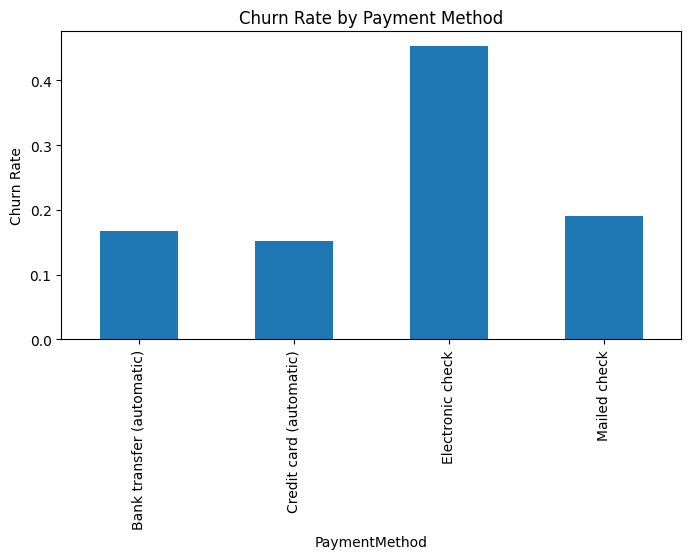

In [13]:
# PaymentMethod vs Churn
payment_method_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').mean()) # Calculate the churn rate for each payment method
plt.figure(figsize=(8, 4))
payment_method_churn.plot(kind='bar')
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate')
plt.show()

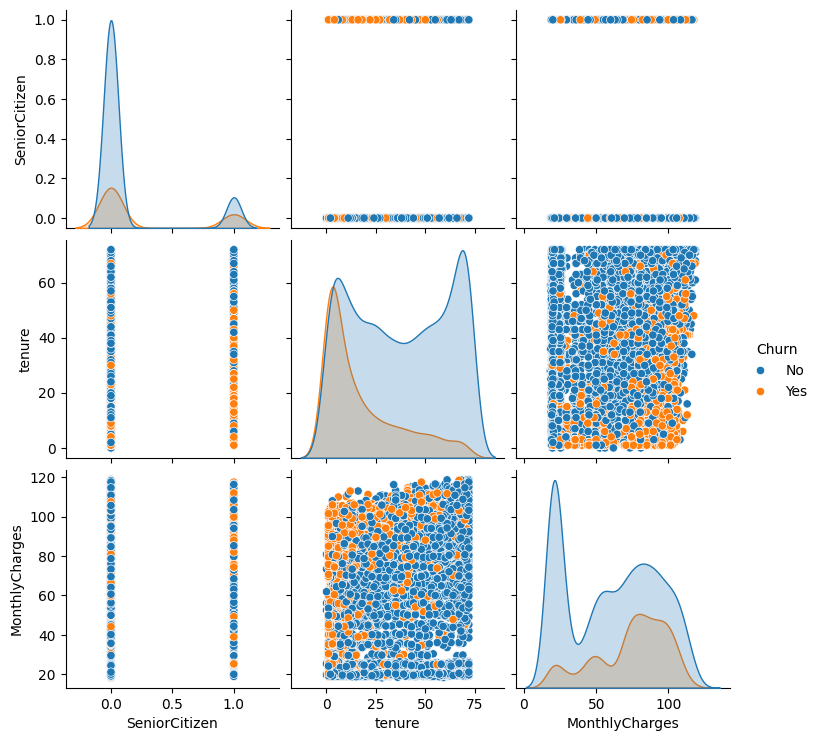

In [14]:
# Pair plot for key numerical features
# Ensure numeric_columns contains only numerical features
numeric_columns = df.select_dtypes(include=['number']).columns  # Select only numerical columns

sns.pairplot(df, vars=numeric_columns, hue='Churn')
plt.show()

C:\Users\swast\AppData\Local\Temp\ipykernel_15044\4217352251.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], label='Churned', shade=True)
C:\Users\swast\AppData\Local\Temp\ipykernel_15044\4217352251.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'No']['tenure'], label='Not Churned', shade=True)


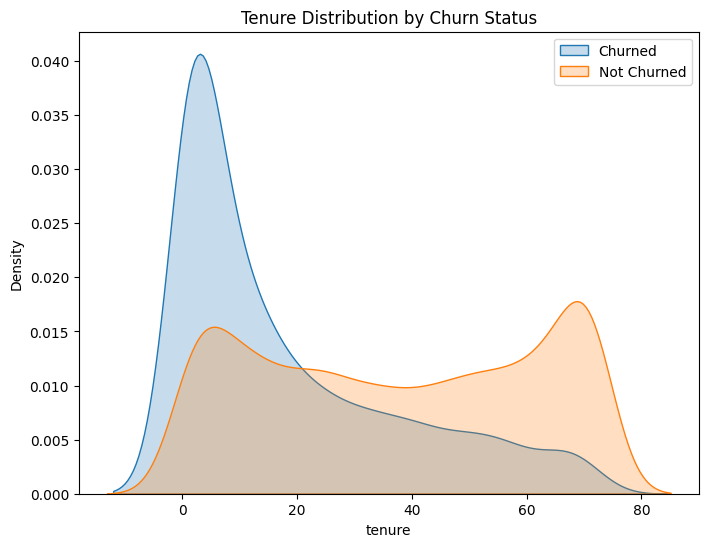

In [15]:
# Tenure distribution for churned vs non-churned customers
plt.figure(figsize=(8, 6))
# Assuming 'Churn' is the original column with 'Yes' and 'No' values
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], label='Churned', shade=True)
sns.kdeplot(df[df['Churn'] == 'No']['tenure'], label='Not Churned', shade=True)
plt.title('Tenure Distribution by Churn Status')
plt.legend()
plt.show()